In [7]:
# Importación de las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid", palette="viridis")

In [10]:
# URLs de los datasets de cada tienda
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Cargar y concatenar los datos en un solo DataFrame
lista_dfs = []
for nombre_tienda, url in urls.items():
    df_tienda = pd.read_csv(url)
    df_tienda['Tienda'] = nombre_tienda
    lista_dfs.append(df_tienda)

df_consolidado = pd.concat(lista_dfs, ignore_index=True)

# Muestra de los datos consolidados
print("Primeras filas del DataFrame consolidado:")
df_consolidado.head()

Primeras filas del DataFrame consolidado:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual para los gráficos
sns.set_style("whitegrid")
sns.set_palette("viridis")

Facturación Total por Tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


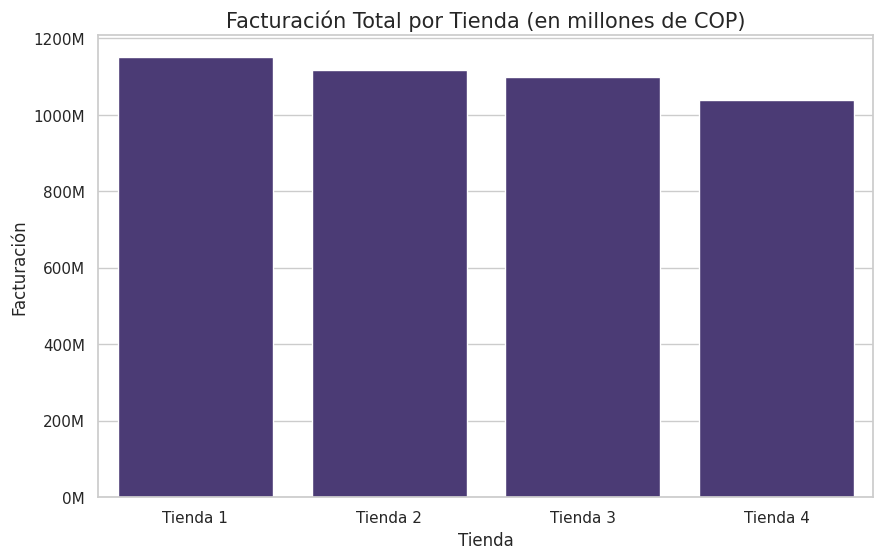

In [12]:
# Calcular la facturación total por tienda
facturacion = df_consolidado.groupby('Tienda')['Precio'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=facturacion.index, y=facturacion.values)
ax.set_title('Facturación Total por Tienda (en millones de COP)', fontsize=15)
ax.set_xlabel('Tienda')
ax.set_ylabel('Facturación')

# Formatear el eje Y para mostrar valores en millones
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

print("Facturación Total por Tienda:")
print(facturacion)
plt.show()

<Figure size 1200x700 with 0 Axes>

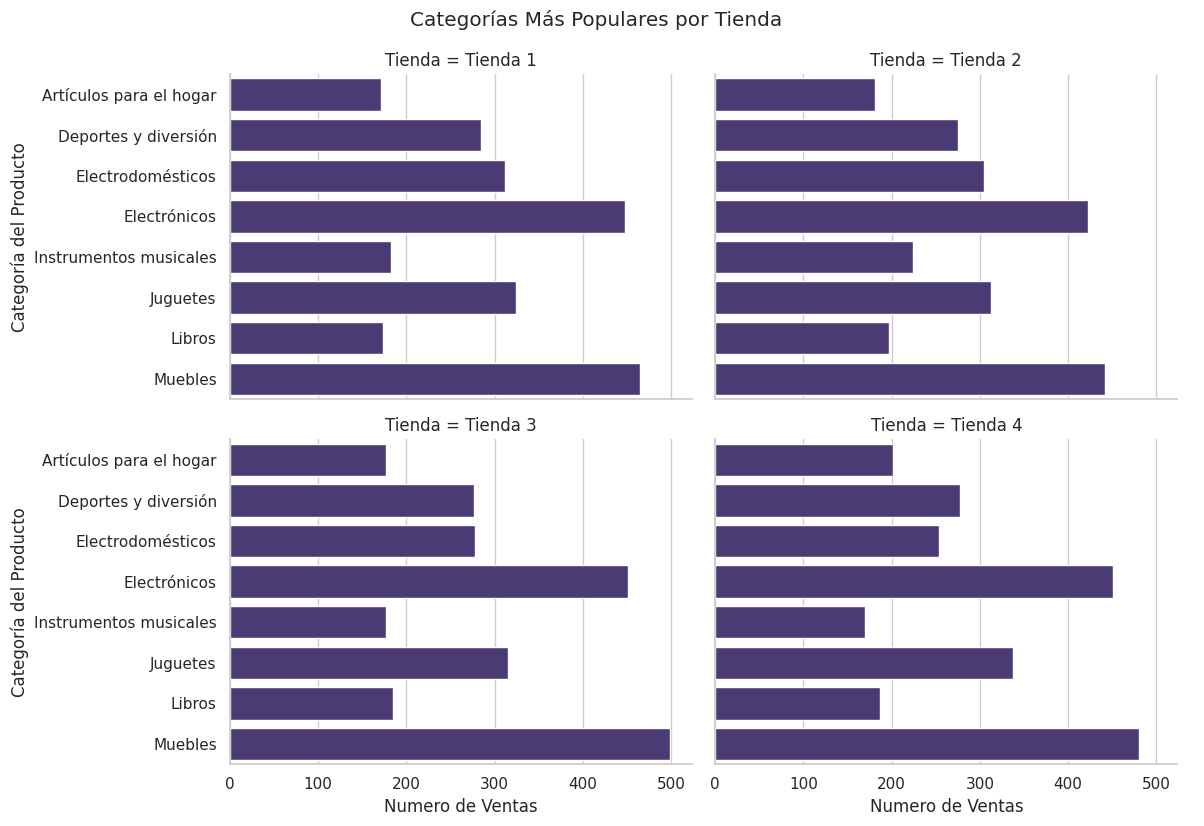

In [13]:
# Contar ventas por categoría en cada tienda
ventas_categoria = df_consolidado.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Numero de Ventas')

# Visualizar las categorías más populares
plt.figure(figsize=(12, 7))
sns.catplot(data=ventas_categoria, x='Numero de Ventas', y='Categoría del Producto', col='Tienda', kind='bar', col_wrap=2, height=4, aspect=1.5)
plt.suptitle('Categorías Más Populares por Tienda', y=1.03)
plt.show()

In [14]:
# Obtener los 5 productos más vendidos por tienda
top_productos = df_consolidado.groupby('Tienda')['Producto'].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

print("Top 5 Productos Más Vendidos por Tienda:")
print(top_productos)

Top 5 Productos Más Vendidos por Tienda:
Tienda    Producto                 
Tienda 1  Armario                      60
          Microondas                   60
          TV LED UHD 4K                60
          Secadora de ropa             58
          Bloques de construcción      56
Tienda 2  Iniciando en programación    65
          Microondas                   62
          Batería                      61
          Guitarra acústica            58
          Pandereta                    58
Tienda 3  Kit de bancas                57
          Cama king                    56
          Mesa de comedor              56
          Mesa de noche                55
          Set de ollas                 55
Tienda 4  Cama box                     62
          Cubertería                   59
          Cama king                    56
          Dashboards con Power BI      56
          Carrito de control remoto    55
Name: count, dtype: int64


In [15]:
# Calcular el promedio de calificación general y por tienda
calificacion_general = df_consolidado['Calificación'].mean()
calificacion_tienda = df_consolidado.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)

print(f"Promedio de Calificación General: {calificacion_general:.2f} ⭐")
print("\nPromedio de Calificación por Tienda:")
print(calificacion_tienda)

Promedio de Calificación General: 4.01 ⭐

Promedio de Calificación por Tienda:
Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificación, dtype: float64


In [16]:
# Contar todos los productos vendidos
conteo_productos = df_consolidado['Producto'].value_counts()

print("Top 5 Productos MÁS vendidos en general:")
print(conteo_productos.head(5))
print("\nTop 5 Productos MENOS vendidos en general:")
print(conteo_productos.tail(5))

Top 5 Productos MÁS vendidos en general:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Name: count, dtype: int64

Top 5 Productos MENOS vendidos en general:
Producto
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


In [17]:
# Calcular el costo de envío promedio por tienda
costo_envio = df_consolidado.groupby('Tienda')['Costo de envío'].mean().sort_values()

print("Costo de Envío Promedio por Tienda:")
print(costo_envio.apply(lambda x: f"${x:,.2f} COP"))

Costo de Envío Promedio por Tienda:
Tienda
Tienda 4    $23,459.46 COP
Tienda 3    $24,805.68 COP
Tienda 2    $25,216.24 COP
Tienda 1    $26,018.61 COP
Name: Costo de envío, dtype: object


Análisis de los Resultados y Conclusión
Luego de un exhaustivo análisis de los datos de las cuatro tiendas de AluraStore Latam, hemos identificado las siguientes tendencias clave que nos permiten entender el desempeño de cada una.

Análisis Comparativo
Facturación: La Tienda 1 se posiciona como líder indiscutible, superando los 1,150 millones de COP en facturación total. Las Tiendas 2 y 3 mantienen un rendimiento sólido y están muy cerca una de la otra en ingresos. En contraste, la Tienda 4 se ubica consistentemente en el último lugar, con apenas $1,038 millones de COP en ingresos.

Ventas por Categoría: Observamos que categorías de alto valor como Electrónicos y Muebles son populares en todas las tiendas. Sin embargo, el volumen de ventas en estas categorías es notablemente inferior en la Tienda 4, lo que explica en gran medida su baja facturación general.

Satisfacción del Cliente: El promedio general de satisfacción es de 4.01, un buen indicador. No obstante, al analizar los datos por tienda, nos encontramos con que la Tienda 1 y la Tienda 4 tienen las calificaciones promedio más bajas. Para la Tienda 1, esto es una señal de alerta seria, ya que a pesar de ser la que más vende, podría estar enfrentando problemas de servicio al cliente que, a largo plazo, podrían afectar su reputación y la fidelidad de sus clientes.

Costos de Envío: Los costos de envío son relativamente uniformes entre todas las tiendas, lo que sugiere que no hay una desventaja operativa significativa en este aspecto para ninguna de ellas.

Conclusión Final
Basados en este análisis, podemos concluir que la Tienda 4 presenta el rendimiento más bajo en múltiples métricas críticas. No solo genera los ingresos más bajos, sino que también tiene una de las calificaciones de cliente más deficientes y un menor volumen de ventas en las categorías más rentables.

Por otro lado, las Tiendas 2 y 3 demuestran ser las más estables y equilibradas, con una buena facturación y una sólida satisfacción del cliente. La Tienda 1, a pesar de ser la líder en ingresos, necesita poner un foco urgente en mejorar su experiencia del cliente para mantener su posición y asegurar su éxito a futuro.

Recomendaciones para el Sr. Juan
Acción Principal: Es recomendable realizar una evaluación estratégica sobre la viabilidad de la Tienda 4. Dados sus bajos indicadores de rendimiento en comparación con las demás, se debería considerar una reestructuración profunda o incluso la desinversión (venta) para enfocar los recursos en las sucursales más rentables.

Acción Secundaria: Es crucial implementar un plan de mejora de la calidad del servicio en la Tienda 1. Aunque es la que más factura, su baja calificación de clientes es un riesgo que debe ser mitigado para asegurar la sostenibilidad de su éxito y evitar problemas de reputación a futuro.